<a href="https://colab.research.google.com/github/Fujisupakon/pharma-sales-prediction/blob/main/new_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('pharma-data.csv')

In [ ]:
#choose feature
features = ['Quantity', 'Price', 'Month', 'Year', 'Product Class']

x = df[features]
y = df['Sales']

In [ ]:
categorical = x.select_dtypes(include="object").columns.tolist()
numeric = x.select_dtypes(include=["int64","float64"]).columns.tolist()

In [ ]:
# Preprocessing
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
    ("num", StandardScaler(), numeric)
])

In [ ]:
# Pipeline
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

In [ ]:
print(x.isna().sum())

Quantity         1
Price            1
Month            1
Year             1
Product Class    1
dtype: int64


In [ ]:
x = x.dropna()
y = y.loc[x.index] # sync target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [ ]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Month', 'Product Class']),
                                                 ('num', StandardScaler(),
                                                  ['Quantity', 'Price',
                                                   'Year'])])),
                ('model', LinearRegression())])

In [ ]:
pred = pipeline.predict(x_test)

In [ ]:
# Evaluate
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print("Linear Regression (Pipeline) Metrics:")
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²: {r2:.4f}")

Linear Regression (Pipeline) Metrics:
MAE: 26,694.37
RMSE: 125,016.93
R²: 0.7833


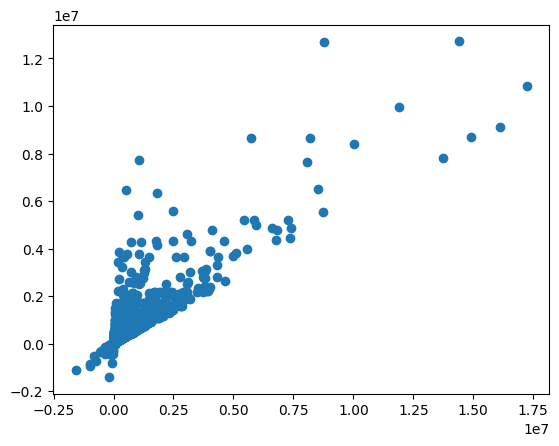

In [ ]:
plt.scatter(y_test, pred)